
Preprocess öncesi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  4900 non-null   object
 1   text      4900 non-null   object
dtypes: object(2)
memory usage: 76.7+ KB


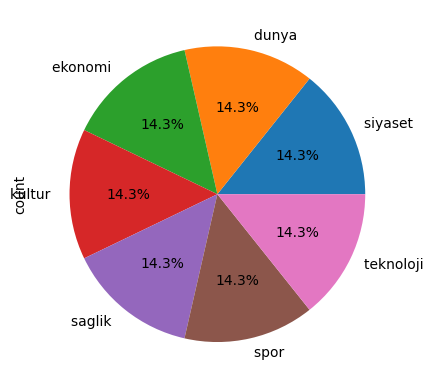

In [ ]:
import pandas as pd
df_new = pd.read_csv("7allV03.csv")
df_new["category"].value_counts().plot(kind="pie", autopct="%.1f%%")
df_new.info()

Duplicated işlemi yapıldı ve tekrar indexlendi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4540 entries, 0 to 4539
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  4540 non-null   object
 1   text      4540 non-null   object
dtypes: object(2)
memory usage: 71.1+ KB


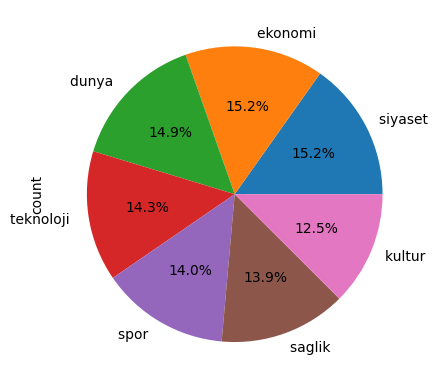

In [ ]:
import pandas as pd
df = pd.read_csv("7allV03.csv")
df.head()
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df["category"].value_counts().plot(kind="pie", autopct="%.1f%%")
df.info()

Text temizleme işlemleri yapıldı stop-word vs..


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.3 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import pandas as pd
import re
import string
import emoji
from nltk.tokenize import word_tokenize

# Load the dataset
file_path = '7allV03.csv'
df = pd.read_csv(file_path)

df = df.drop_duplicates()
df = df.reset_index(drop=True)

# Example abbreviation dictionary for conversion (you should define your own abbreviations)
kisaltmalar = {
    "AA":  "Anadolu Ajansı",
    "AAET":  "Avrupa Atom Enerjisi Topluluğu",
    "AB": "Avrupa Birliği",
    "ABB": "Avrupa Birliği Bankası",
    "ABGS": "Avrupa Birliği Genel Sekreterliği",
    "ABKF": "Avrupa Bölgesel Kalkınma Fonu",
    "ABÖ": "Afrika Birliği Örgütü",
    "ACÜ": "Acıbadem Üniversitesi",
    "AÇSAP": "Ana Çocuk Sağlığı ve Aile Planlaması Genel Müdürlüğü",
    "ADKF": "Abu Dabi Kalkınma Fonu",
    "ADSL": "Asimetrik sayısal abone hattı (Asymmetric Digital Subscriber Line)",
    "ADÜ": "Adnan Menderes Üniversitesi",
    "ADYÜ": "Adıyaman Üniversitesi",
    "AEGM": "Kültür ve Turizm Bakanlığı Araştırma ve Eğitim Genel Müdürlüğü",
    "AEİBÖ": "Avrupa Ekonomik İş Birliği Örgütü",
    "AET": "Avrupa Ekonomik Topluluğu",
    "AEÜ": "Ahi Evran Üniversitesi",
    "AFAD": "Afet ve Acil Durum Yönetimi Başkanlığı",
    "AFFB": "Avrupa Futbol Federasyonları Birliği",
    "AFİF": "Akaryakıt Fiyat İstikrar Fonu",
    "AGİK": "Avrupa Güvenlik ve İş Birliği Konferansı",
    "AGİT": "Avrupa Güvenlik ve İş Birliği Teşkilatı",
    "AGM": "Ağaçlandırma ve Erozyon Kontrolü Genel Müdürlüğü",
    "AİBÖ": "Avrupa İş Birliği Örgütü",
    "AİBÜ": "Abant İzzet Baysal Üniversitesi",
    "AİÇÜ": "Ağrı İbrahim Çeçen Üniversitesi",
    "AIDS": "Edinilmiş bağışıklık yetersizliği belirtisi",
    "AİHAD": "Avrupa İnsan Hakları Adalet Divanı",
    "AİHM": "Avrupa İnsan Hakları Mahkemesi",
    "AİHS": "Avrupa İnsan Hakları Sözleşmesi",
    "AİK": "Afrika İktisat Komisyonu",
    "AİKB": "Avrupa İmar ve Kalkınma Bankası",
    "AİPB": "Avrupa İktisadi ve Parasal Birliği",
    "AK": "Avrupa Konseyi",
    "AKB": "Afrika Kalkınma Bankası",
    "AKBB": "Afrika Kalkınma Bankaları Birliği",
    "AKBİL": "Akıllı bilet",
    "AKÇT": "Avrupa Kömür ve Çelik Topluluğu",
    "AKD": "Akdeniz Üniversitesi" ,
    "AKDTYK": "Atatürk Kültür, Dil ve Tarih Yüksek Kurumu",
    "AKM": "Atatürk Kültür Merkezi",
    "AKPM": "Avrupa Konseyi Parlamenterler Meclisi",
    "AKUT": "Arama Kurtarma Teşkilatı",
    "AKÜ": "Afyon Kocatepe Üniversitesi",
    "Alb.": "Albay",
    "ALES": "Akademik Personel ve Lisanüstü Eğitimi Giriş Sınavı",
    "Alm.":  "Almanca",
    "AMB": "Amerika Merkez Bankası",
    "AMK": "Amerikan Merkez Komutanlığı",
    "ANAM": "Avrupa Nükleer Araştırma Merkezi",
    "anat.": "Anatomi",
    "ANAÜ": "Anadolu Üniversitesi",
    "ANT": "Akaryakıt İkmal ve Nato Pol Tesisleri İşletme Başkanlığı",
    "ant.": "Antropoloji",
    "AO": "Anonim ortaklık",
    "AOÇ": "Atatürk Orman Çiftliği",
    "AÖB": "Avrupa Ödemeler Birliği",
    "AÖF": "Açıköğretim Fakültesi",
    "AP": "ABD Haber Ajansı",
    "APA": "Avrupa Para Anlaşması",
    "APB": "Avrupa Para Birliği",
    "APE": "Avrupa Para Enstitüsü",
    "APF": "Arap Para Fonu",
    "APİİB": "Asya Pasif ik İktisadi İş Birliği",
    "APÖ": "Avrupa Parlamenterler Örgütü",
    "APS": "Acele Posta Servisi",
    "Apt.": "Apartman",
    "Ar.": "Arapça",
    "AREL": "İstanbul Arel Üniversitesi",
    "AR-GE": "Araştırma geliştirme",
    "ark.": "Arkeoloji",
    "Arş. Gör.": "Araştırma Görevlisi",
    "As.": "Asker",
    "As. İz.": "Askerî İnzibat",
    "ASAL": "Asker Alma Dairesi Başkanlığı",
    "Asb.": "Astsubay",
    "ASELSAN": "Askerî Elektronik Sanayi",
    "ASF": "Avrupa Sosyal Fonu",
    "ASİGM": "Adli Sicil ve İstatistik Genel Müdürlüğü",
    "ASK": "Avrupa Standartlar Komitesi",
    "ASKİ": "Ankara Su ve Kanalizasyon İdaresi",
    "ASO": "Ankara Sanayi Odası",
    "AST": "Ankara Sanat Tiyatrosu",
    "ASTB": "Amerika Serbest Ticaret Bölgesi",
    "astr.": "Astronomi",
    "astrol.": "Astroloji",
    "ASÜ": "Aksaray Üniversitesi",
    "AŞ": "Anonim şirket",
    "AŞTİ": "Ankara Şehirler Arası Terminal İşletmesi",
    "AT": "Avrupa Topluluğu",
    "ATAD": "Avrupa Toplulukları Adalet Divanı",
    "ATAM": "Atatürk Araştırma Merkezi",
    "ATATÜRK ÜNİ": "Atatürk Üniversitesi",
    "ATB": "Asya Takas Birliği",
    "Atğm.": "Asteğmen",
    "ATK": "Adli Tıp Kurumu",
    "atm.": "Atmosfer",
    "ATO": "Ankara Ticaret Odası",
    "ATÜ": "Atılım Üniversitesi",
    "ATYGF": "Avrupa Tarımsal Yönlendirme ve Garanti Fonu",
    "AUA": "Avrupa Uzay Ajansı",
    "AÜ": "Ankara Üniversitesi",
    "Av.": "Avukat",
    "AVM": "Alışveriş merkezi",
    "AYB": "Avrupa Yayın Birliği",
    "AYİM": "Askerî Yüksek İdare Mahkemesi",
    "AYM": "Anayasa Mahkemesi",
    "BADET": "Batı Afrika Devletleri Ekonomik Topluluğu",
    "BAE": "Birleşik Arap Emirlikleri",
    "bağ.": "Bağlaç",
    "BAĞ-KUR": "Esnaf ve Sanatkârlar ve Diğer Bağımsız Çalışanlar Sosyal Sigortalar Kurumu",
    "BAKB": "Batı Afrika Kalkınma Bankası",
    "BASAGM": "Başbakanlık Aile ve Sosyal Araştırmalar Genel Müdürlüğü",
    "BATO": "Batı Afrika Takas Odası",
    "BAU": "Bahçeşehir Üniversitesi",
    "BAÜN": "Balıkesir Üniversitesi",
    "BAY ÜNİ": "Bayburt Üniversitesi",
    "BBC": "İngiliz Radyo Televizyon Kurumu",
    "BCG": "Verem aşısı",
    "Bçvş.": "Başçavuş",
    "BD": "Bilim dalı",
    "BDDK": "Bankacılık Düzenleme ve Denetleme Kurulu",
    "BDT": "Bağımsız Devletler Topluluğu",
    "BE": "Büyükelçi",
    "BEÜ": "Bitlis Eren Üniversitesi",
    "BİB": "Bayındırlık ve İskân Bakanlığı",
    "BİK": "Basın İlan Kurumu",
    "bit. b.": "Bitki bilimi",
    "biy.": "Biyoloji",
    "bk.": "Bakınız",
    "bl.": "Bilişim",
    "Bl.": "Bölük",
    "BM": "Birleşmiş Milletler",
    "BMAEK": "Birleşmiş Milletler Avrupa Ekonomik Komisyonu",
    "BMÇYT": "Birleşmiş Milletler Çocuklara Yardım Teşkilatı",
    "BMEBKT": "Birleşmiş Milletler Eğitim, Bilim ve Kültür Teşkilatı",
    "BMSKÖ": "Birleşmiş Milletler Sınai Kalkınma Örgütü",
    "BMT": "Birleşmiş Milletler Teşkilatı",
    "BMTKK": "Birleşmiş Milletler Ticaret ve Kalkınma Konferansı",
    "BMYRİ": "Birleşmiş Milletler Yardım ve Rehabilitasyon İdaresi",
    "Bn.": "Bayan",
    "Bnb.": "Binbaşı",
    "BOREN": "Ulusal Bor Araştırma Enstitüsü ",
    "BOTAŞ": "Boru Hatları ile Petrol Taşıma Anonim Şirketi",
    "Böl.": "Bölüm",
    "BRT": "Bartın Üniversitesi",
    "bs.": "Baskı",
    "Bşk.": "Başkan",
    "BTF": "Başbakanlık Tanıtma Fonu Kurulu",
    "BTK": "Bilgi Teknolojileri ve İletişim Kurumu",
    "BTÜ": "Bursa Teknik Üniversitesi",
    "Bul.": "Bulvar",
    "Bulg.": "Bulgarca",
    "BÜ": "Boğaziçi Üniversitesi",
    "BÜMKO": "Bütçe ve Mali Kontrol Genel Müdürlüğü",
    "BVÜ": "Bezmiâlem Vakıf Üniversitesi",
    "BYEGM": "Basın-Yayın ve Enformasyon Genel Müdürlüğü",
    "Cad.": "Cadde",
    "CBÜ": "Celâl Bayar Üniversitesi",
    "CC": "Konsolosluk birimi",
    "CGS": "Uluslararası fizik birimleri sistemi",
    "CIF": "Maliyet-sigorta-navlun",
    "CİGM": "Ceza İşleri Genel Müdürlüğü",
    "CIP": "Taşıma ve sigorta bedeli ödenmiş olarak teslim",
    "cm": "Santimetre",
    "CMK": "Ceza Muhakemesi Kanunu",
    "CMUK": "Ceza Muhakemeleri Usulü Kanunu",
    "coğ.": "Coğrafya",
    "cos": "Kosinüs",
    "CSO": "Cumhurbaşkanlığı Senfoni Orkestrası",
    "CTE": "Ceza ve Tevkifevleri Genel Müdürlüğü",
    "Cum. Bşk.": "Cumhurbaşkanı",
    "CÜ": "Cumhuriyet Üniversitesi",
    "ÇAĞ ÜNİ": "Çağ Üniversitesi",
    "ÇASGEM": "Çalışma ve Sosyal Güvenlik Eğitim ve Araştırma Merkezi",
    "ÇAYKUR": "Çay İşletmeleri Genel Müdürlüğü",
    "ÇED": "Çevresel Etki Değerlendirmesi ve Planlama Genel Müdürlüğü",
    "çev.": "Çeviren",
    "ÇGM": "Çalışma ve Sosyal Güvenlik Bakanlığı Çalışma Genel Müdürlüğü",
    "ÇNÜ": "Çankırı Karatekin Üniversitesi",
    "ÇOMÜ": "Çanakkale Onsekiz Mart Üniversitesi",
    "ÇS": "Çimento Sanayisi",
    "ÇSGB": "Çalışma ve Sosyal Güvenlik Bakanlığı",
    "ÇUKOBİRLİK": "Çukurova Pamuk Tarım Satış Kooperatifleri Birliği",
    "ÇÜ": "Çankaya Üniversitesi",
    "Çvş.": "Çavuş",
    "ÇYGM": "Çevre Yönetimi Genel Müdürlüğü",
    "DAGM": "Devlet Arşivleri Genel Müdürlüğü",
    "DAKB": "Doğu Afrika Kalkınma Bankası",
    "dal": "Dekalitre",
    "dam": "Dekametre",
    "DAP": "Doğu Anadolu Projesi",
    "DAT": "Doğu Afrika Topluluğu",
    "DB": "Dünya Bankası",
    "db.": "Dil bilgisi",
    "DBAFİT": "Dünya Bankalar Arası Finansal İletişim Topluluğu",
    "DDB": "Dernekler Dairesi Başkanlığı",
    "DDY": "Devlet Deniz Yolları",
    "DESİYAB": "Devlet Sanayi ve İşçi Yatırım Bankası",
    "DEÜ": "Dokuz Eylül Üniversitesi",
    "DFİF": "Destekleme ve Fiyat İstikrar Fonu",
    "DFMHÖ": "Dünya Fikrî Mülkiyet Hakları Örgütü",
    "dg": "Desigram",
    "DGK": "Dünya Gıda Konseyi",
    "DGM": "Devlet Güvenlik Mahkemesi",
    "DGÖ": "Dünya Gümrük Örgütü",
    "DGS": "Dikey Geçiş Sınavı",
    "DHMİ": "Devlet Hava Meydanları İşletmesi",
    "DİB": "Diyanet İşleri Başkanlığı",
    "DİE": "Devlet İstatistik Enstitüsü",
    "dil b.": "Dil bilimi",
    "DİYİH": "Çalışma ve Sosyal Güvenlik Bakanlığı Dış İlişkiler ve Yurt Dışı İşçi Hizmetleri Genel Müdürlüğü",
    "dk.": "Dakika",
    "DKK": "Deniz Kuvvetleri Komutanlığı",
    "DKMP": "Doğa Koruma ve Millî Parklar Genel Müdürlüğü",
    "dl": "Desilitre",
    "DLH": "Demiryollar Limanlar ve Hava Meydanları İnşaatı Genel Müdürlüğü",
    "dm": "Desimetre",
    "DMİ": "Devlet Meteoroloji İşleri Genel Müdürlüğü",
    "DMO": "Devlet Malzeme Ofisi",
    "DNA": "Deoksirübo nükleik asit",
    "DOBGM": "Devlet Opera ve Balesi Genel Müdürlüğü",
    "Doç.": "Doçent",
    "doğ.": "Doğum tarihi",
    "DOÜ": "Doğuş Üniversitesi",
    "DÖGM": "Din Öğretimi Genel Müdürlüğü",
    "DÖSİM": "Kültür ve Turizm Bakanlığı Döner Sermaye İşletmesi Merkez Müdürlüğü",
    "DPB": "Devlet Planlama Başkanlığı",
    "DPT": "Devlet Planlama Teşkilatı Müsteşarlığı",
    "DPÜ": "Dumlupınar Üniversitesi",
    "Dr.": "Doktor",
    "drl.": "Derleyen",
    "DSİ": "Devlet Su İşleri Genel Müdürlüğü",
    "DSO": "Devlet Sanayi Ofisi",
    "DSÖ": "Dünya Sağlık Örgütü",
    "DT": "Devlet Tiyatroları Genel Müdürlüğü",
    "DTCF": "Dil ve Tarih-Coğrafya Fakültesi",
    "DTM": "Dış Ticaret Müsteşarlığı",
    "DTÖ": "Dünya Ticaret Örgütü",
    "DÜ": "Dicle Üniversitesi",
    "Dz. Kuv. K.": "Deniz Kuvvetleri Komutanı",
    "Dz. Kuv.": "Deniz Kuvvetleri",
    "dzl.": "Düzenleyen",
    "EAT": "Eski Anadolu Türkçesi",
    "EBK": "Et ve Balık Kurumu Genel Müdürlüğü",
    "Ecz.": "Eczacı",
    "ed.": "Editör",
    "EEG": "Beyin akım grafiği",
    "EFT": "Bankalar arası para aktarımı",
    "EGM": "Emniyet Genel Müdürlüğü",
    "EGO": "Ankara Belediyesi Elektrik, Gaz, Otobüs İşletmeleri",
    "EĞİTEK": "Eğitim Teknolojileri Genel Müdürlüğü",
    "EİBKT": "Ekonomik İş Birliği ve Kalkınma Teşkilatı",
    "EİBÖ": "Ekonomik İş Birliği Örgütü",
    "EİEİ": "Elektrik İşleri Etüt İdaresi Genel Müdürlüğü",
    "EKG": "Kalp akım grafiği",
    "ekon.": "Ekonomi",
    "EMG": "Kasakım grafiği",
    "EMK": "Elektromotor kuvvet",
    "Ens.": "Enstitü",
    "EPDK": "Enerji Piyasası Düzenleme Kurulu",
    "ERDEMİR": "Ereğli Demir Çelik Fabrikaları",
    "Erm.": "Ermenice",
    "ERÜ": "Erciyes Üniversitesi",
    "ESGM": "Esnaf ve Sanatkârlar Genel Müdürlüğü",
    "ESHOT": "İzmir Belediyesi Elektrik, Su, Hava Gazı, Otobüs, Tramvay İşletmeleri",
    "ESOGÜ": "Eskişehir Osmangazi Üniversitesi",
    "ET": "Eski Türkçe",
    "ETKB": "Enerji ve Tabii Kaynaklar Bakanlığı",
    "ETOGM": "Erkek Teknik Öğretim Genel Müdürlüğü",
    "EÜ": "Ege Üniversitesi",
    "EÜAŞ": "Elektrik Üretim Anonim Şirketi",
    "EXİMBANK": "Türkiye İhracat ve Kredi Bankası",
    "FAB": "Federal Araştırma Bürosu",
    "Fak.": "Fakülte",
    "Fak-Fuk": "Fon Sosyal Yardımlaşma ve Dayanışmayı Teşvik Fonu",
    "Far.": "Farsça",
    "FBA": "Fransız Basın Ajansı",
    "fel.": "Felsefe",
    "fil.": "Filoloji",
    "FIR": "Uçuş hattı düzenlemesi",
    "FİSKOBİRLİK": "Fındık Tarım Satış Kooperatifleri Birliği",
    "fiz.": "Fizik",
    "fizy.": "Fizyoloji",
    "FKB": "Fizik, kimya, biyoloji",
    "FM": "Frekans modülasyonu",
    "IÜ": "Işık Üniversitesi",
    "Fr.": "Fransızca",
    "FSMVÜ": "Fatih Sultan Mehmet Vakıf Üniversitesi",
    "FÜ": "Fırat Üniversitesi",
    "g": "Gram",
    "GAMHK": "Güney Avrupa Müttefik Hava Kuvvetleri",
    "GAP": "Güneydoğu Anadolu Projesi",
    "GAPBKİ": "GAP Bölge Kalkınma İdaresi Başkanlığı",
    "GATA": "Gülhane Askerî Tıp Akademisi",
    "GAUT": "Güneydoğu Asya Uluslar Topluluğu",
    "GAZÜ": "Gaziantep Üniversitesi",
    "GB": "Gigabyte",
    "GBT": "Genel Bilgi Taraması",
    "GDAOP": "Güney ve Doğu Afrika Ortak Pazarı",
    "Gen.": "General",
    "geom.": "Geometri",
    "GİB": "Gelir İdaresi Başkanlığı",
    "GİGM": "Başbakanlık Güvenlik İşleri Genel Müdürlüğü",
    "gn.": "Genel",
    "Gnkur.": "Genelkurmay",
    "GOÜ": "Gaziosmanpaşa Üniversitesi",
    "Gön.": "Gönderen",
    "gr.": "Gramer",
    "Grt": "Groston",
    "GSGM": "Gençlik ve Spor Genel Müdürlüğü",
    "GSM": "Mobil cep telefonu",
    "GSMH": "Gayrisafi millî hasıla",
    "GSÜ": "Galatasaray Üniversitesi",
    "GSYH": "Gayrisafi yurt içi hasıla",
    "GTÖ": "Gıda ve Tarım Örgütü",
    "GÜ": "Gazi Üniversitesi",
    "GYD": "Görüntülü yoğun disk",
    "GYTE": "Gebze Yüksek Teknoloji Enstitüsü",
    "GZK": "Gazikent Üniversitesi",
    "HA": "Harp Akademisi",
    "HABITAT": "Birleşmiş Milletler İnsan Yerleşimleri Konferansı",
    "HACCP": "Kritik kontrol noktalarında tehlike analizi",
    "HAVAŞ": "Hava Alanları ve Yer Hizmetleri Genel Müdürlüğü",
    "hay. b.": "Hayvan bilimi",
    "haz.": "Hazırlayan",
    "HDD": "Ana bellek sürücüsü",
    "hek.": "Hekimlik",
    "HGK": "Harita Genel Komutanlığı",
    "HGM": "Haberleşme Genel Müdürlüğü",
    "HİTÜ": "Hitit Üniversitesi",
    "HKK": "Hava Kuvvetleri Komutanlığı",
    "hl": "Hektolitre",
    "hlk.": "Halk ağzı",
    "HM": "Hazine Müsteşarlığı",
    "hm": "Hektometre",
    "HMUK": "Hukuk Muhakemeleri Usulü Kanunu",
    "HO": "Harp Okulu",
    "HRÜ": "Harran Üniversitesi",
    "Hs. Uzm.": "Hesap Uzmanı",
    "HSSGM": "Sağlık Bakanlığı Hudut ve Sahiller Sağlık Genel Müdürlüğü",
    "HUK": "Maliye Bakanlığı Hesap Uzmanları Kurulu Başkanlığı",
    "huk.": "Hukuk",
    "HÜ": "Hacettepe Üniversitesi",
    "Hv. Kuv. K.": "Hava Kuvvetleri Komutanı",
    "Hv. Kuv.": "Hava Kuvvetleri",
    "Hz. öz.": "Hizmete özel",
    "Hz.": "Hazreti",
    "IĞDÜ": "Iğdır Üniversitesi",
    "İAÜ": "İstanbul Aydın Üniversitesi",
    "İbr.": "İbranice",
    "İBÜ": "İstanbul Bilim Üniversitesi",
    "İBÜN": "İstanbul Bilgi Üniversitesi",
    "İDBÜ": "İhsan Doğramacı Bilkent Üniversitesi",
    "İDT": "İktisadi Devlet Teşekkülleri",
    "İEGM": "İlaç ve Eczacılık Genel Müdürlüğü",
    "İETT": "İstanbul Elektrik, Tünel, Tramvay İşletmesi",
    "İEÜ": "İzmir Ekonomi Üniversitesi",
    "İGB": "Başbakanlık İdareyi Geliştirme Başkanlığı",
    "İGEME": "İhracatı Geliştirme Etüd Merkezi",
    "İGM": "İlköğretim Genel Müdürlüğü",
    "İHB": "İnsan Hakları Başkanlığı",
    "İKB": "İslam Kalkınma Bankası",
    "İKBÜ": "İstanbul Kemerburgaz Üniversitesi",
    "İKÖ": "İslam Konferansı Örgütü",
    "İKÜ": "İstanbul Kültür Üniversitesi",
    "İKV": "İktisadi Kalkınma Vakfı",
    "İLBANK": "İller Bankası Genel Müdürlüğü",
    "İMKB": "İstanbul Menkul Kıymetler Borsası",
    "İng.": "İngilizce",
    "INTERPOL": "Uluslararası Cinayet Polisi Komisyonu",
    "İO": "İlköğretim okulu",
    "is.": "İsim",
    "ISBN": "Uluslararası standart kitap numarası",
    "İSDEMİR": "İskenderun Demir Çelik Fabrikaları",
    "İSEDAK": "İslam Konferansı Örgütü Ekonomik ve Ticari İş Birliği Daimî Komitesi",
    "İSG": "İş Sağlığı ve Güvenliği Genel Müdürlüğü",
    "İSKİ": "İstanbul Su ve Kanalizasyon İdaresi",
    "İSKYF": "İktisadi ve Sosyal Kalkınma Yatırım Fonları",
    "ISMN": "Uluslararası standart müzik numarası",
    "İSO": "İstanbul Sanayi Odası",
    "İsp.": "İspanyolca",
    "ISSN": "Uluslararası standart dizi numarası",
    "İŞKUR": "Türkiye İş Kurumu",
    "işl.": "İşleyen",
    "İŞOT": "İstanbul Şehirler Arası Otobüs Terminali",
    "İt.": "İtalyanca",
    "İTB": "İstanbul Ticaret Borsası",
    "İTG": "İç Ticaret Genel Müdürlüğü",
    "İTİCÜ": "İstanbul Ticaret Üniversitesi",
    "ITO": "Birleşmiş Milletler Uluslararası Ticaret Birliği",
    "İTO": "İstanbul Ticaret Odası",
    "İTÜ": "İstanbul Teknik Üniversitesi",
    "İÜ": "İstanbul Üniversitesi",
    "İYTE": "İzmir Yüksek Teknoloji Enstitüsü",
    "İZTB": "İzmir Ticaret Borsası",
    "İZTO": "İzmir Ticaret Odası",
    "Jap.": "Japonca",
    "jeol.": "Jeoloji",
    "JGK": "Jandarma Genel Komutanlığı",
    "JHY": "Japon Hava Yolları",
    "kal": "Kalori",
    "KARDEMİR": "Karabük Demir Çelik Fabrikaları",
    "KASTB": "Kuzey Amerika Serbest Ticaret Bölgesi",
    "KAÜ": "Kafkas Üniversitesi",
    "KBB": "Kulak, Burun, Boğaz",
    "KBÜ": "Karabük Üniversitesi",
    "KDV": "Katma değer vergisi",
    "KED": "Kablosuz Erişim Düzeneği",
    "KEGM": "Kıyı Emniyeti Genel Müdürlüğü",
    "KEİ": "Karadeniz Ekonomik İş Birliği",
    "KEYK": "Karşılıklı Ekonomik Yardım Konseyi",
    "kg": "Kilogram",
    "KGB": "Sovyet Gizli Haber Alma Teşkilatı",
    "KGM": "Adalet Bakanlığı Kanunlar Genel Müdürlüğü",
    "KHK": "Kanun hükmünde kararname",
    "KHÜ": "Kadir Has Üniversitesi",
    "KHz": "Kilohertz",
    "KİBİB": "Kalkınma İçin Bölgesel İş Birliği",
    "KİK": "Kamu İhale Kurumu",
    "kim.": "Kimya",
    "KİT": "Kamu İktisadi Teşekkülü",
    "KİYÜ": "Kilis 7 Aralık Üniversitesi",
    "KKB": "Karayip Kalkınma Bankası",
    "KKGM": "Tarım ve Köyişleri Bakanlığı Koruma ve Kontrol Genel Müdürlüğü",
    "KKK": "Kara Kuvvetleri Komutanlığı",
    "KKTC": "Kuzey Kıbrıs Türk Cumhuriyeti",
    "KLÜ": "Kırklareli Üniversitesi",
    "km": "Kilometre",
    "KMS": "Kurumlar İçi Merkezî Eleme Sınavı",
    "KMÜ": "Karamanoğlu Mehmetbey Üniversitesi",
    "KOBİ": "Küçük ve Orta Boy İşletme",
    "KOİ": "Kamu Ortaklığı İdaresi",
    "koor.": "Koordinasyon",
    "Kor.": "Kolordu",
    "Kora.": "Koramiral",
    "Korg.": "Korgeneral",
    "KOSGEB": "Küçük ve Orta Ölçekli İşletmeleri Geliştirme ve Destekleme İdaresi Başkanlığı",
    "KOÜ": "Kocaeli Üniversitesi",
    "KPDS": "Kamu Personeli Yabancı Dil Bilgisi Seviye Tespit Sınavı",
    "KPSS": "Kamu Personel Seçme Sınavı",
    "kr.": "Kuruş",
    "krş.": "Karşılaştırınız",
    "KSDB": "Kanserle Savaş Dairesi Başkanlığı",
    "KSGM": "Kadının Statüsü Genel Müdürlüğü",
    "KSÜ": "Kahramanmaraş Sütçü İmam Üniversitesi",
    "KTKB": "Karadeniz Ticaret ve Kalkınma Bankası",
    "KTO": "Karatay Üniversitesi",
    "KTOP": "Karayip Topluluğu ve Ortak Pazarı",
    "KTÖGM": "Kız Teknik Öğretim Genel Müdürlüğü",
    "KTÜ": "Karadeniz Teknik Üniversitesi",
    "KUGM": "Kara Ulaştırma Genel Müdürlüğü",
    "Kur. Bşk.":  "Kurmay Başkanı",
    "Kur.": "Kurmay",
    "KÜ": "Kastamonu Üniversitesi",
    "KVMGM": "Kültür Varlıkları ve Müzeler Genel Müdürlüğü",
    "KYGM": "Kütüphaneler ve Yayımlar Genel Müdürlüğü",
    "l": "Litre",
    "LABB": "Latin Amerika Bütünleşme Birliği",
    "LAKEK": "Latin Amerika ve Karayipler Ekonomik Komisyonu",
    "LASTB": "Latin Amerika Serbest Ticaret Bölgesi",
    "Lat.": "Latince",
    "LCV": "Lütfen cevap veriniz",
    "LES": "Lisansüstü Eğitim Giriş Sınavı",
    "LP": "Uzunçalar",
    "LPG": "Sıvılaştırılmış Petrol Gazı",
    "Ltd.": "Limitet",
    "LYS": "Lisans Yerleştirme Sınavı",
    "m": "Metre",
    "M": "Miladi",
    "Mac.": "Macarca",
    "Mah.": "Mahalle",
    "MAKÜ": "Mehmet Akif Ersoy Üniversitesi",
    "man.": "Mantık",
    "MAÖ": "Merkezî Antlaşma Örgütü",
    "MASAK": "Mali Suçları Araştırma Kurulu Başkanlığı",
    "mat.": "Matematik",
    "MAÜ": "Mardin Artuklu Üniversitesi",
    "MB": "Megabyte",
    "Md.": "Müdür",
    "MEB": "Millî Eğitim Bakanlığı",
    "mec.": "Mecaz",
    "MEÜ": "Mersin Üniversitesi",
    "MGK": "Millî Güvenlik Kurulu Genel Sekreterliği",
    "MGM": "İçişleri Bakanlığı Mahalli İdareler Genel Müdürlüğü",
    "MĞÜ": "Muğla Üniversitesi",
    "MHAT": "Merkezî Haber Alma Teşkilatı",
    "MHz": "Megahertz",
    "MİGEM": "Maden İşleri Genel Müdürlüğü",
    "MİLE": "Millî Emlak Genel Müdürlüğü",
    "mim.": "Mimarlık",
    "min.": "Mineraloji",
    "MİT": "Millî İstihbarat Teşkilatı Müsteşarlığı",
    "MK": "Medeni Kanun",
    "MKB": "Millî Kütüphane Başkanlığı",
    "MKE": "Makine ve Kimya Endüstrisi Kurumu",
    "MKS": "Metre-Kilogram-Saat",
    "MKÜ": "Mustafa Kemal Üniversitesi",
    "MKYK": "Merkez Karar Yönetim Kurulu",
    "mm": "Milimetre",
    "MOBESE": "Bölgesel güvenlik sistemi",
    "MOSSAD": "İsrail Gizli Haber Alma Örgütü",
    "MÖ": "Milattan önce",
    "MPİ": "Millî Piyango İdaresi Genel Müdürlüğü",
    "MPM": "Millî Prodüktivite Merkezi",
    "MR": "Manyetik rezonans görüntüleme",
    "MS": "Milattan sonra",
    "MSB": "Millî Savunma Bakanlığı",
    "MSGSÜ": "Mimar Sinan Güzel Sanatlar Üniversitesi",
    "MTA": "Maden Tetkik ve Arama Genel Müdürlüğü",
    "MÜ": "Marmara Üniversitesi",
    "Müh.": "Mühendis",
    "Mür.": "Müracaat",
    "müz.": "Müzik",
    "MYK": "Mesleki Yeterlilik Kurumu",
    "NASA": "Amerikan Ulusal Havacılık ve Uzay Araştırmaları Merkezi",
    "NATO": "Kuzey Atlantik Antlaşması Teşkilatı",
    "NEÜ": "Nevşehir Üniversitesi",
    "NĞÜ": "Niğde Üniversitesi",
    "NKÜ": "Namık Kemal Üniversitesi",
    "No.": "Numara",
    "NOTAM": "Havacılar ve denizciler için uyarı bildirimi",
    "Nö.": "Nöbetçi",
    "Nö. Sb.": "Nöbetçi subayı",
    "NVİGM": "Nüfus ve Vatandaşlık İşleri Genel Müdürlüğü",
    "OAİB": "Orta Anadolu İhracatçı Birlikleri Genel Sekreterliği",
    "OAOP": "Orta Amerika Ortak Pazarı",
    "ODTÜ": "Orta Doğu Teknik Üniversitesi",
    "ODÜ": "Ordu Üniversitesi",
    "OGM": "Orman Genel Müdürlüğü",
    "OKÖNEGM": "Okul Öncesi Eğitimi Genel Müdürlüğü",
    "Okt.": "Okutman",
    "OKÜ": "Osmaniye Korkut Ata Üniversitesi",
    "OMÜ": "Ondokuz Mayıs Üniversitesi",
    "Onb.": "Onbaşı",
    "Opr.": "Operatör",
    "Or.": "Ordu",
    "Ora.": "Oramiral",
    "Ord.": "Ordinaryüs",
    "Org.": "Orgeneral",
    "ORKÖY": "Orman-Köy İlişkileri Genel Müdürlüğü",
    "Ort.": "Ortaklık",
    "OSB": "Organize Sanayi Bölgesi",
    "Osm. T.": "Osmanlı Türkçesi",
    "OYAK": "Ordu Yardımlaşma Kurumu",
    "OYEGM": "Öğretmen Yetiştirme ve Eğitimi Genel Müdürlüğü",
    "ÖÇKKB": "Özel Çevre Koruma Kurumu Başkanlığı",
    "ÖİB": "Özelleştirme İdaresi Başkanlığı",
    "öl.": "Ölüm tarihi",
    "ÖÖKGM": "Özel Öğretim Kurumları Genel Müdürlüğü",
    "ör.": "Örnek",
    "ÖRGM": "Özel Eğitim Rehberlik ve Danışma Hizmetleri Genel Müdürlüğü",
    "ÖSGM": "Sanayi ve Ticaret Bakanlığı Ölçüler ve Standartlar Genel Müdürlüğü",
    "ÖSS": "Öğrenci Seçme Sınavı",
    "ÖSYM": "Ölçme, Seçme ve Yerleştirme Merkezi",
    "ÖTV": "Özel tüketim vergisi",
    "ÖYK": "Özelleştirme Yüksek Kurulu",
    "ÖYS": "Öğrenci Yerleştirme Sınavı",
    "öz.": "Özel",
    "ÖZİ": "Özürlüler İdaresi Başkanlığı",
    "ÖZÜ": "Özyeğin Üniversitesi",
    "PAÜ": "Pamukkale Üniversitesi",
    "ped.": "Pedagoji",
    "PETKİM": "Petrokimya Endüstrisi Genel Müdürlüğü",
    "PİEAÜÖ": "Petrol İhraç Eden Arap Ülkeleri Örgütü",
    "PİEÜT": "Petrol İhraç Eden Ülkeler Teşkilatı",
    "PİGM": "Petrol İşleri Genel Müdürlüğü",
    "PK": "Posta kutusu",
    "PO": "Petrol Ofisi",
    "POAŞ": "Petrol Ofisi Anonim Şirketi",
    "Port.": "Portekizce",
    "Prof.": "Profesör",
    "psikol.": "Psikoloji",
    "PTT": "Posta ve Telgraf Teşkilatı Genel Müdürlüğü",
    "RAM": "Bilgisayarda okunabilir ve yazılabilir bellek",
    "RC": "Kızılhaç",
    "RK": "Rekabet Kurumu",
    "RNA": "Ribo nükleik asit",
    "ROM": "Bilgisayarda yalnızca okunabilir bellek",
    "RSHM": "Refik Saydam Hıfzıssıhha Merkezi Başkanlığı",
    "RTÜK": "Radyo ve Televizyon Üst Kurulu",
    "Rum.": "Rumca",
    "Rus.": "Rusça",
    "RÜ": "Rize Üniversitesi",
    "s.": "Sayfa",
    "sa.": "Saat",
    "SAS": "Su Altı Savunma",
    "SAT": "Su Altı Taarruz",
    "SATEM": "Savunma Sanayii ve Teknoloji Eğitim Merkezi",
    "SAÜ": "Sakarya Üniversitesi",
    "Sb.": "Subay",
    "SB": "Sağlık Bakanlığı",
    "SBF": "Siyasal Bilgiler Fakültesi",
    "SBS": "Seviye Belirleme Sınavı",
    "SDÜ": "Süleyman Demirel Üniversitesi",
    "SEFD Bşk.": "Millî Savunma Bakanlığı Seferberlik Dairesi Başkanlığı",
    "SEK": "Süt Endüstrisi Kurumu Sanayi ve Ticaret Anonim Şirketi",
    "SEKA": "Selüloz ve Kâğıt Sanayii Kurumu",
    "sf.": "Sıfat",
    "SG": "Sahil Güvenlik",
    "SGK": "Sosyal Güvenlik Kurumu",
    "SGM": "Sanayi ve Ticaret Bakanlığı Sanayi Genel Müdürlüğü",
    "SHÇEK": "Sosyal Hizmetler ve Çocuk Esirgeme Kurumu",
    "SHGM": "Sivil Havacılık Genel Müdürlüğü",
    "SHÖ": "Sivil Havacılık Örgütü",
    "SİÜ": "Siirt Üniversitesi",
    "SKT": "Son kullanma tarihi",
    "Sl.": "Slavca",
    "Sn.": "Sayın",
    "sn.": "Saniye",
    "snt.": "Santral",
    "SNÜ": "Sinop Üniversitesi",
    "Sok.": "Sokak",
    "SOS": "Uluslararası yardım isteme uyarısı",
    "sos.": "Sosyoloji",
    "sp.": "Spor",
    "SPK": "Sermaye Piyasası Kurulu",
    "Srp.": "Sırpça",
    "SSCB": "Sovyet Sosyalist Cumhuriyetleri Birliği",
    "SSDB": "Sağlık Bakanlığı Sıtma Savaş Dairesi Başkanlığı",
    "SSK": "Sosyal Sigortalar Kurumu",
    "SSM": "Savunma Sanayi Müsteşarlığı",
    "STB": "Sanayi ve Ticaret Bakanlığı",
    "STK": "Sivil Toplum Kuruluşu",
    "STÖ": "Sivil Toplum Örgütü",
    "SUGES": "Sudan gelen sağlık",
    "SÜ": "Sabancı Üniversitesi",
    "SYD": "Sayısal yoğun disk",
    "SYDGM": "Sosyal Yardımlaşma ve Dayanışma Genel Müdürlüğü",
    "Şb.": "Şube",
    "ŞÜ": "Şırnak Üniversitesi",
    "t": "Ton",
    "T.C.": "Türkiye Cumhuriyeti",
    "TAA": "Türkiye Adalet Akademisi",
    "TAEK": "Türkiye Atom Enerjisi Kurumu",
    "TAGEM": "Tarımsal Araştırmalar Genel Müdürlüğü",
    "tar.": "Tarih",
    "TARİŞ": "Tarım Satış Kooperatifleri Birliği",
    "TASS": "Sovyetler Birliği Telgraf Ajansı",
    "TAŞ": "Türk Anonim Şirketi",
    "TAU": "Teknik Araştırma ve Uygulama Genel Müdürlüğü",
    "Tb.": "Tabur",
    "TBB": "Türkiye Bankalar Birliği",
    "TBMM": "Türkiye Büyük Millet Meclisi",
    "TCDD": "Türkiye Cumhuriyeti Devlet Demiryolları",
    "TCK": "Türkiye Cumhuriyeti Karayolları",
    "TCMB": "Türkiye Cumhuriyet Merkez Bankası",
    "TCZB": "Türkiye Cumhuriyeti Ziraat Bankası",
    "TDÇİ": "Türkiye Demir Çelik İşletmeleri",
    "TDİ": "Türkiye Denizcilik İşletmeleri",
    "TDK": "Türk Dil Kurumu",
    "TEAE": "Tarımsal Ekonomi Araştırma Enstitüsü",
    "TEAŞ": "Türkiye Elektrik Üretim Anonim Şirketi",
    "TEDAŞ": "Türkiye Elektrik Dağıtım Anonim Şirketi",
    "TEDGEM": "Teşkilatlanma ve Destekleme Genel Müdürlüğü",
    "TEFE": "Toptan eşya fiyatları endeksi",
    "TEİAŞ": "Türkiye Elektrik İletim Anonim Şirketi",
    "TEK": "Türkiye Elektrik Kurumu",
    "tek.": "Teknik",
    "tel.": "Telefon",
    "telg.": "Telgraf",
    "TEM": "Avrupa Transit Kara Yolu",
    "TEMSAN": "Türkiye Elektromekanik Sanayii",
    "TETAŞ": "Türkiye Elektrik, Ticaret ve Taahhüt Anonim Şirketi",
    "TFF": "Türkiye Futbol Federasyonu Başkanlığı",
    "TGC": "Türkiye Gazeteciler Cemiyeti",
    "TGM": "Kültür ve Turizm Bakanlığı Tanıtma Genel Müdürlüğü",
    "TGS": "Türkiye Gazeteciler Sendikası",
    "Tğm.": "Teğmen",
    "THA": "Türk Haberler Ajansı",
    "THK": "Türk Hava Kurumu",
    "THS": "Türk Havacılık Sanayii",
    "THSGM": "Telif Hakları ve Sinema Genel Müdürlüğü",
    "THY": "Türk Hava Yolları",
    "TIR": "Uluslararası Kara Yolu Taşımacılığı",
    "tic.": "Ticaret",
    "TİGEM": "Tarım İşletmeleri Genel Müdürlüğü",
    "TİKA": "Türk İş Birliği ve Koordinasyon Ajansı Başkanlığı",
    "TİM": "Türkiye İhracatçılar Merkezi",
    "TİSK": "Türkiye İşverenler Sendikası Konfederasyonu",
    "tiy.": "Tiyatro",
    "TKAE": "Türk Kültürünü Araştırma Enstitüsü",
    "TKB": "Türkiye Kalkınma Bankası",
    "TKF": "Toplu Konut Fonu",
    "TKGM": "Tapu ve Kadastro Genel Müdürlüğü",
    "TKİ": "Türkiye Kömür İşletmeleri",
    "TL": "Türk lirası",
    "tlks.": "Teleks",
    "tls.": "Telsiz",
    "TM": "Türk malı",
    "TMMOB": "Türk Mühendis ve Mimar Odaları Birliği",
    "TMO": "Toprak Mahsulleri Ofisi",
    "TMSF": "Tasarruf Mevduatı Sigorta Fonu",
    "TMSK": "Türkiye Muhasebe Standartları Kurulu",
    "TNCÜ": "Tunceli Üniversitesi",
    "TOBB": "Türkiye Odalar ve Borsalar Birliği",
    "TOBB ETÜ": "TOBB Ekonomi ve Teknoloji Üniversitesi",
    "TODAİE": "Türkiye ve Orta Doğu Amme İdaresi Enstitüsü",
    "TOEFL": "Yabancı dil olarak İngilizce testi",
    "TOKİ": "Toplu Konut İdaresi Başkanlığı",
    "Top.": "Topçu",
    "TÖMER": "Türkçe Öğretim Merkezi",
    "TP": "Türk Petrolleri",
    "TPAO": "Türkiye Petrolleri Anonim Ortaklığı",
    "TPE": "Türk Patent Enstitüsü",
    "TR": "Türkiye",
    "TRGM": "Tarım Reformu Genel Müdürlüğü",
    "TRKGM": "Tüketicinin ve Rekabetin Korunması Genel Müdürlüğü",
    "TRS": "Toros Üniversitesi",
    "TRT": "Türkiye Radyo ve Televizyon Kurumu",
    "TSE": "Türk Standartları Enstitüsü",
    "TSİ": "Türkiye saati ile",
    "TSK": "Türk Silahlı Kuvvetleri",
    "TSKB": "Türkiye Sınai Kalkınma Bankası",
    "TT": "Türkiye Türkçesi",
    "TTB": "Türk Tabipleri Birliği",
    "TTK": "Türk Tarih Kurumu",
    "TTKB": "Talim ve Terbiye Kurulu Başkanlığı",
    "TTOK": "Türkiye Turing ve Otomobil Kurumu",
    "TUBİM": "Türkiye Uyuşturucu ve Uyuşturucu Bağımlılığını İzleme Merkezi",
    "Tug.": "Tugay",
    "Tuğa.": "Tuğamiral",
    "Tuğg.": "Tuğgeneral",
    "PDR": "Psikolojik danışmanlık ve rehberlik",
}

# Function to convert abbreviations in the text
def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens = [kisaltmalar[word] if word in kisaltmalar.keys() else word for word in tokens]
    text = ' '.join(tokens)
    return text

# Apply the preprocessing steps
df["Text Cleaned"] = df["text"].apply(convert_abbrev_in_text)

# Convert to lowercase
df['Text Cleaned'] = [token.lower() for token in df['Text Cleaned']]

# Remove URLs
df['Text Cleaned'] = df['Text Cleaned'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

# Remove numbers
df['Text Cleaned'] = df['Text Cleaned'].apply(lambda x: re.sub('[0-9]+', '', x))

# Remove punctuation
df['Text Cleaned'] = df['Text Cleaned'].apply(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove specific unwanted characters
df['Text Cleaned'] = df['Text Cleaned'].apply(lambda x: x.replace('"', '').replace("’", '').replace("'", '').replace("”", ''))

# Remove email addresses
df['Text Cleaned'] = df['Text Cleaned'].apply(lambda x: re.sub('\S*@\S*\s?', '', x))

# Remove emojis
df['Text Cleaned'] = df['Text Cleaned'].apply(lambda x: emoji.replace_emoji(x))

# Remove HTML tags
df['Text Cleaned'] = df['Text Cleaned'].apply(lambda x: re.sub('<.*?>', '', x))

# Load stopwords
stop_words = [x.strip() for x in open('stop-words.tr.txt','r', encoding="UTF8").read().split('\n')]

# Remove stopwords
df['Text Cleaned'] = df['Text Cleaned'].apply(lambda text: ' '.join([word for word in text.split() if word.lower() not in stop_words]))

# Remove less frequent words (words that occur only once)
freq = pd.Series(' '.join(df['Text Cleaned']).split()).value_counts()
less_freq = list(freq[freq == 1].index)
df['Text Cleaned'] = df['Text Cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))

# Show the first few rows of the cleaned text
df[['text', 'Text Cleaned']].head()

# Save the cleaned data to a new CSV file
output_file = 'cleanedtext_7allV03.csv'
df.to_csv(output_file, index=False)

print(f"Cleaned data saved to {output_file}")


Cleaned data saved to cleanedtext_7allV03.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4540 entries, 0 to 4539
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      4540 non-null   object
 1   text          4540 non-null   object
 2   Text Cleaned  4540 non-null   object
dtypes: object(3)
memory usage: 106.5+ KB


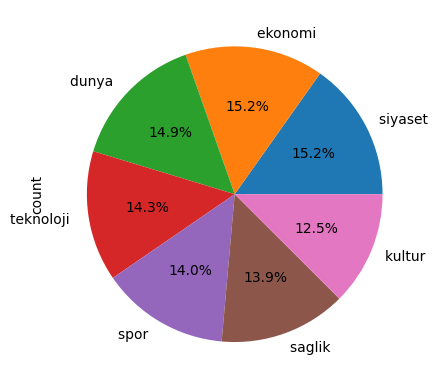

In [ ]:
df_text = pd.read_csv("cleanedtext_7allV03.csv")
df_text["category"].value_counts().plot(kind="pie", autopct="%.1f%%")
df_text.info()

Ekonomi: 690
Siyaset: 690
Dunya: 676
Teknoloji: 649
Spor: 635
Sağlık: 631
Kültür: 567

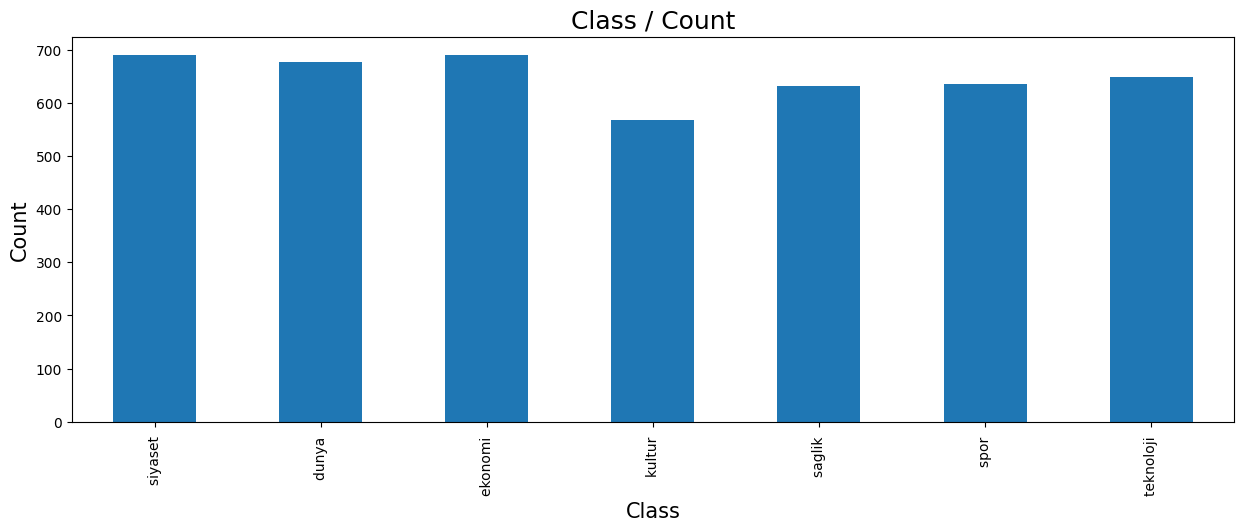

In [ ]:
from collections import Counter # Import the 'Counter' class
import pandas as pd
import matplotlib.pyplot as plt

tags = Counter(df["category"]).keys()
tags_len = Counter(df["category"]).values()
tag_df = pd.DataFrame(zip(tags, tags_len), columns=["Class", "Count"])
tag_df.plot(x="Class", y="Count", kind="bar", legend=False, grid=False, figsize=(15, 5))
plt.title("Class / Count", fontsize=18)
plt.xlabel("Class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [1]:
from jpype import JClass, JString, getDefaultJVMPath, startJVM, shutdownJVM
import os
import jpype
import pandas as pd
import stanza

# Zemberek JAR dosyasının yolu
ZEMBEREK_PATH = 'zemberek-full.jar'

# JAR dosyasının varlığını kontrol et
if not os.path.exists(ZEMBEREK_PATH):
    raise FileNotFoundError("Zemberek JAR dosyası bulunamadı. Lütfen yolu kontrol edin.")

# JVM'yi başlat
if not jpype.isJVMStarted():
    startJVM(getDefaultJVMPath(), '-ea', f'-Djava.class.path={ZEMBEREK_PATH}')

# Zemberek sınıflarını yükle
TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
morphology = TurkishMorphology.createWithDefaults()

# Stanza Türkçe modeli indirme ve başlatma
stanza.download('tr')
nlp = stanza.Pipeline('tr', processors='tokenize,mwt,pos,lemma', use_gpu=True)

# Zemberek ile kök bulma fonksiyonu
def zemberek_root_extraction(text):
    analysis = morphology.analyzeAndDisambiguate(JString(text)).bestAnalysis()
    roots = []
    for a in analysis:
        roots.append(str(a.getStem()))  # Kök değerini listeye ekle
    return ' '.join(roots)

def stanza_lemmatization(text):
    doc = nlp(text)
    lemmas = []
    for sentence in doc.sentences:
        for word in sentence.words:
            # Eğer lemma None ise orijinal kelimeyi kullan
            lemmas.append(word.lemma if word.lemma is not None else word.text)
    return ' '.join(lemmas)



# Veri setini yükle
file_path = 'cleanedtext_7allV03.csv'
df = pd.read_csv(file_path)



# Stanza ile lemmatizasyon işlemi
df['Zemberek Roots'] = df['Text Cleaned'].apply(stanza_lemmatization)
# Zemberek ile kök bulma işlemi
df['Stanza Lemmas'] = df['Zemberek Roots'].apply(zemberek_root_extraction)
# İşlenmiş veriyi yeni bir CSV dosyasına kaydet
output_file = 'processed_with_zemberek_stanza.csv'
df.to_csv(output_file, index=False)

print(f"Processed data with Zemberek and Stanza saved to {output_file}")

# JVM'yi kapat
shutdownJVM()


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: tr (Turkish) ...
INFO:stanza:File exists: /root/stanza_resources/tr/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: tr (Turkish):
| Processor | Package       |
-----------------------------
| tokenize  | imst          |
| mwt       | imst          |
| pos       | imst_charlm   |
| lemma     | imst_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


Processed data with Zemberek and Stanza saved to processed_with_zemberek_stanza.csv


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np

# CSV dosyasını yükle
file_path = 'processed_with_zemberek_stanza.csv'
df = pd.read_csv(file_path)

# Bag of Words ile Özellik Çıkarma
def bag_of_words_feature_extraction(text_data):
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(text_data)
    feature_names = vectorizer.get_feature_names_out()
    return bow_matrix.toarray(), feature_names

# TF-IDF ile Özellik Çıkarma
def tfidf_feature_extraction(text_data):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(text_data)
    feature_names = vectorizer.get_feature_names_out()
    return tfidf_matrix.toarray(), feature_names

# Word2Vec ile Özellik Çıkarma
def word2vec_feature_extraction(text_data, vector_size=100, window=5, min_count=1):
    # Cümleleri tokenize et
    tokenized_sentences = [sentence.split() for sentence in text_data]

    # Word2Vec modelini eğit
    w2v_model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count, sg=1)

    # Word2Vec modelini kaydet
    w2v_model.save("word2vec_model.model")
    print("Word2Vec modeli 'word2vec_model.model' olarak kaydedildi.")

    # Her cümle için ortalama vektör çıkarımı
    sentence_vectors = []
    for sentence in tokenized_sentences:
        word_vectors = [w2v_model.wv[word] for word in sentence if word in w2v_model.wv]
        if word_vectors:
            sentence_vectors.append(np.mean(word_vectors, axis=0))  # Ortalama vektör
        else:
            sentence_vectors.append(np.zeros(vector_size))  # Boş cümleler için sıfır vektör

    return np.array(sentence_vectors), w2v_model

# Stanza Lemmas sütunundan metni al
text_data = df['Stanza Lemmas'].dropna().tolist()

# Bag of Words Özellik Çıkarma
bow_features, bow_vocab = bag_of_words_feature_extraction(text_data)

# TF-IDF Özellik Çıkarma
tfidf_features, tfidf_vocab = tfidf_feature_extraction(text_data)

# Word2Vec Özellik Çıkarma
vector_size = 100  # Word2Vec vektör boyutu
w2v_features, w2v_model = word2vec_feature_extraction(text_data, vector_size=vector_size)

# Bag of Words özelliklerini eklemek için DataFrame oluşturma
bow_df = pd.DataFrame(bow_features, columns=[f"BoW_{feature}" for feature in bow_vocab])

# TF-IDF özelliklerini eklemek için DataFrame oluşturma
tfidf_df = pd.DataFrame(tfidf_features, columns=[f"TFIDF_{feature}" for feature in tfidf_vocab])

# Word2Vec özelliklerini eklemek için DataFrame oluşturma
w2v_df = pd.DataFrame(w2v_features, columns=[f"W2V_dim_{i}" for i in range(vector_size)])

# Mevcut DataFrame'e yeni özellikleri ekleme
df = pd.concat([df.reset_index(drop=True), bow_df, tfidf_df, w2v_df], axis=1)

# Güncellenmiş DataFrame'in kontrolü
print("Güncellenmiş sütunlar:")
print(df.columns)

# Güncellenmiş DataFrame'i CSV olarak kaydetme
output_file = 'enhanced_features_bow_tfidf_w2v_fixed.csv'
df.to_csv(output_file, index=False)

print(f"Güncellenmiş özellikler '{output_file}' dosyasına kaydedildi.")


Word2Vec modeli 'word2vec_model.model' olarak kaydedildi.
Güncellenmiş sütunlar:
Index(['category', 'text', 'Text Cleaned', 'Zemberek Roots', 'Stanza Lemmas',
       'BoW_19', 'BoW__or', 'BoW_aankoop', 'BoW_aaron', 'BoW_aatif',
       ...
       'W2V_dim_90', 'W2V_dim_91', 'W2V_dim_92', 'W2V_dim_93', 'W2V_dim_94',
       'W2V_dim_95', 'W2V_dim_96', 'W2V_dim_97', 'W2V_dim_98', 'W2V_dim_99'],
      dtype='object', length=40223)
Güncellenmiş özellikler 'enhanced_features_bow_tfidf_w2v_fixed.csv' dosyasına kaydedildi.


In [ ]:
pip install jpype1 zemberek-python gensim nltk openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 MB 8.2 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141214 sha256=5b4449eef5d7e21f19d1c2eacb326ab66796705cb163fc288dc2e9e3eadb1fa0
  Stored in directory: /root/.cache/pip/wheels/a7/20/bd/e1477d664f22d99989fd28ee1a43d6633dddb5cb9e801350d5
Successfully built antlr4-python3-runtime


In [ ]:
tokenizer = TurkishTokenizer.DEFAULT #TurkishTokenizer.DEFAULT kullanılarak kelimeleri tokenlere ayırmak için tokenizer oluşturma
morphology = TurkishMorphology.create_with_defaults() #Türkçe morfolojik analiz yapmak için nesne oluşturma

NameError: name 'TurkishTokenizer' is not defined

In [ ]:
pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 36.4 MB/s eta 0:00:00


In [ ]:
pip install numpy==1.23.2 pandas==1.4.4 scipy==1.9.1 tensorflow==2.12.0 gensim==4.3.3


INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.